In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# def url list
url = 'https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors'
# Make a GET request to the target URL to get the raw HTML data
r = requests.get(url).text
 
# Use BeautifulSoup to parse HTML
soup = BeautifulSoup(r,'html.parser')

# question 1

In [ ]:
# Check pages
pages = soup.findAll(class_ = ' undefined display--inline-block__373c0__2de_K border-color--default__373c0__2oFDT')
page = [p.text for p in pages]
try:
  pages_amount = int(page[-1])
except Exception:
  print('class might be wrong or page amount is 1')
  pages_amount = 1
else:
  print(pages_amount)

4


In [ ]:
def current_page_output(url):

  r = requests.get(url).text
  # Use BeautifulSoup to parse HTML
  soup = BeautifulSoup(r,'html.parser')

  review_body = soup.findAll('section', {'class': ' margin-t4__373c0__1TRkQ padding-t4__373c0__3hVZ3 border--top__373c0__19Owr border-color--default__373c0__2oFDT',
                                        'aria-label': 'Recommended Reviews'})
  
  names,rates,date,content = [],[],[],[]
  customer_content = review_body[0].findAll('div', class_ = ' review__373c0__13kpL border-color--default__373c0__2oFDT')

  for customer in customer_content:
    con_temp = customer.findAll(class_='raw__373c0__3rcx7', attrs={'lang':'en'})
    dat_temp = customer.findAll('span',class_ = ' css-e81eai')
    r_temp = customer.findAll('div', role = 'img')

    reply_name = customer.find('p', class_ = ' css-m6anxm')
    if reply_name == None:
      content.append(con_temp[0].text)
      date.append(dat_temp[0].text)
      rates.append(r_temp[0]['aria-label'])
    else:
      content.append(con_temp[0].text)
      date.append(dat_temp[0].text)
      rates.append(r_temp[0]['aria-label'])

    n_temp = customer.find('a',class_ = 'css-166la90')
    names.append(n_temp.text)
    
    # if len(r_temp) > 1:
    #   names.append(n_temp.text)
    #   for ra in r_temp:
    #     rate_t = ra['aria-label']
    #     rates.append(rate_t)
    # else:
    #   rates.append(r_temp[0]['aria-label'])
  return [names,rates,date,content]


In [ ]:
ini_data = current_page_output(url)
whole_data = {'names':ini_data[0] , 'rates':ini_data[1] , 'date':ini_data[2] , 'content':ini_data[3]}

In [ ]:
if pages_amount > 1:
  for pa in range(1,pages_amount):
    url_temp = url + '&start=' + str(10*pa)
    page_data_cur = current_page_output(url_temp)
    whole_data['names'] = whole_data['names'] + page_data_cur[0]
    whole_data['rates'] = whole_data['rates'] + page_data_cur[1]
    whole_data['date'] = whole_data['date'] + page_data_cur[2]
    whole_data['content'] = whole_data['content'] + page_data_cur[3]


In [ ]:
df = pd.DataFrame(whole_data)
df.head()

,names,rates,date,content
0,Adriana L.,5 star rating,5/15/2021,With the Covid-19 restrictions lifting I decid...
1,Maxine S.,1 star rating,6/26/2021,It's pretty clear Dr Kohkab is not coming back...
2,Mina I.,5 star rating,6/15/2021,I've been Dr. Najafabadi's patient for a coupl...
3,Gilbert C.,1 star rating,10/16/2020,Horrible Service! Tiffany and Karina are incon...
4,Dustin C.,5 star rating,11/4/2018,"Awesome team, very knowledgeable. My wife was ..."


In [ ]:
df.describe

<bound method NDFrame.describe of            names  ...                                            content
0     Adriana L.  ...  With the Covid-19 restrictions lifting I decid...
1      Maxine S.  ...  It's pretty clear Dr Kohkab is not coming back...
2        Mina I.  ...  I've been Dr. Najafabadi's patient for a coupl...
3     Gilbert C.  ...  Horrible Service! Tiffany and Karina are incon...
4      Dustin C.  ...  Awesome team, very knowledgeable. My wife was ...
5       Rilee C.  ...  I've been trying to get an appointment with a ...
6   Christina U.  ...  Cece the office manager is the most unprofessi...
7      Sharyn H.  ...  I accept the explanation given for the circums...
8     Michael L.  ...  I was there cup of times, never seem by the Dr...
9      Gisela S.  ...  Made me feel like like my visit unimportant. W...
10    Cynthia V.  ...  I was just seen by Mary, the PA, today. Everyo...
11       Lisa B.  ...  For years I have been suffering from bad migra...
12     Blanca C. 

# Question 2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df.to_csv('/content/gdrive/My Drive/NLP assignments/assign1.csv',index=False)

# Question 3

In [ ]:
import nltk

In [ ]:
!pip install pyspellchecker
!pip install contractions
nltk.download('punkt')
nltk.download('stopwords')

     |████████████████████████████████| 2.7MB 5.3MB/s 
     |████████████████████████████████| 327kB 5.2MB/s 
     |████████████████████████████████| 286kB 18.8MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85374 sha256=022789db3b5ac7d00d20e0d15063def564c12ebb2bc7d244e134db10a7f1e582
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from spellchecker import SpellChecker
from string import punctuation
from nltk.corpus import stopwords

In [ ]:
from nltk.tokenize import (sent_tokenize, 
                           word_tokenize, 
                           TreebankWordTokenizer, 
                           wordpunct_tokenize)
import contractions

## Add contraction expansion and Tokenize the content

In [ ]:
# Apply the contraction expansion 
reviews = []
for con in df['content']:
  expanded_word = []
  for word in con.split():
    expanded_word.append(contractions.fix(word))  
  con_temp = ' '.join(expanded_word)
  reviews.append(con_temp)

print(reviews)

# Tokenize the review content
review_token_list = [word_tokenize(i) for i in reviews] # list comprehension
print(*review_token_list[:5], sep= '\n')
print(len(review_token_list))

['With the Covid-19 restrictions lifting I decided to come into the office to see a rheumatologist as my PCP recommend. I was seen by Dr. Stacey Schulman. Dr. Schulman has been a godsend! She listened to my concerns and symptoms. She was able to accurately diagnose me, and immediately start me on a plan. We are still working to find the right medication/dosage combination but I feel that I am in good hands. I have already noticed significant improvements. Thank you, Dr. Schulman.', 'it is pretty clear Dr Kohkab is not coming back. I wish he would have been honest about leaving the practice instead of us having to deal with a NP.', "I have been Dr. Najafabadi's patient for a couple years and have always been very pleased with the care and attention I have received from him. he is very knowledgeable, professional and caring. His staff are also courteous and professional. Great experience overall!", 'Horrible Service! Tiffany and Karina are inconsiderate, rude and disrespectful! do not go

## Check Misspells

In [ ]:
# Check the misspells
spell = SpellChecker()
misspelled = spell.unknown(review_token_list[0])
for comment_token in review_token_list[1:]:
  miss_t = spell.unknown(comment_token)
  misspelled = misspelled.union(miss_t)
print(misspelled)
print(len(misspelled))

{'knowledge.for', 'mary.the', 'vm', 'vs', '.i', 'x-rays', 'nothing.this', 'zuniga', 'would=', 'information*', 'herself.mistreated', 'kokhab', 'norco', '.that', 'b12', "'s", 'nothing.i', 'sweeping..the', 'medication/dosage', '10-325', 'jparedes', 'doctor.highly', 'fibro', '*no', 'dr.kokhab', 'dr.', 'covid-19', 'khaleghi', 'appt', 'dr', 'arthritis.after', 'me.instead', 'specalist', 'marjan', '*all', 'schulman', 'henoch-schonlein', 'ironworker', 'najafabadi', "''", 're-allocated', '...', 'np', '*has', 'a+++', 'react.i', 'hope.thankyou', 'in-office', 'workmans', '*finally*', 'patients.this', 'voicemails.i', 'bc', 'active*', 'copay', 'labwork', 'k', 'm.d', 'kohkab', 'condition.i', 'md', '50/50', '``', 'by.i', 'book.i', 'k.', 'whatsoever*', 'out.stay', 'chrons', '--', 'rheumatology', 'afterward', '5-6', 'gp', 'toradol', 'pcp'}
76


# Question 4 
Normalization function

In [ ]:
# Apply the normalization 
def preprocessing(tokens):
  tokens = [token.lower() for token in tokens] # lowercasing
  tokens = [token for token in tokens if not token.isdigit()] # remove digit - isdigit is a python buit-in method. 
  tokens = [token for token in tokens if token not in punctuation] # remove punctuations

  mystopwords = set(stopwords.words("english")) # we use english stopwords list.
  tokens = [token for token in tokens if token not in mystopwords] # remove stopwords
  
  tokens = [token for token in tokens if len(token)>=3] # remove tokens with one or two characters
  return tokens



In [ ]:
def token_after_normal(text):
  # tokenization
  tokens = wordpunct_tokenize(text)
  # run basic preprocessing
  pre_proc_text = preprocessing (tokens)
  return pre_proc_text

## Normalization output

In [ ]:
whole_rwords = []
for one_review in review_token_list:
  one_review_f = ' '.join(one_review)
  whole_temp = token_after_normal(one_review_f)
  whole_rwords += whole_temp

print(whole_rwords)
print(len(whole_rwords))


['covid', 'restrictions', 'lifting', 'decided', 'come', 'office', 'see', 'rheumatologist', 'pcp', 'recommend', 'seen', 'stacey', 'schulman', 'schulman', 'godsend', 'listened', 'concerns', 'symptoms', 'able', 'accurately', 'diagnose', 'immediately', 'start', 'plan', 'still', 'working', 'find', 'right', 'medication', 'dosage', 'combination', 'feel', 'good', 'hands', 'already', 'noticed', 'significant', 'improvements', 'thank', 'schulman', 'pretty', 'clear', 'kohkab', 'coming', 'back', 'wish', 'would', 'honest', 'leaving', 'practice', 'instead', 'deal', 'najafabadi', 'patient', 'couple', 'years', 'always', 'pleased', 'care', 'attention', 'received', 'knowledgeable', 'professional', 'caring', 'staff', 'also', 'courteous', 'professional', 'great', 'experience', 'overall', 'horrible', 'service', 'tiffany', 'karina', 'inconsiderate', 'rude', 'disrespectful', 'office', 'cancel', 'wife', 'medication', 'respond', 'pharmacy', 'would', 'available', 'pick', 'medication', 'vacation', 'right', 'cance

In [ ]:
rwords_dic = {}
for one_word in whole_rwords:
  if one_word in rwords_dic:
    rwords_dic[one_word] += 1
  else:
    rwords_dic[one_word] = 1


## Top 10 frequent tokens

In [ ]:
sorted_word = sorted(rwords_dic.items() , key=lambda item: item[1] , reverse=True)
sorted_word

[('kokhab', 27),
 ('office', 24),
 ('doctor', 20),
 ('time', 20),
 ('get', 19),
 ('would', 17),
 ('pain', 14),
 ('mary', 13),
 ('back', 12),
 ('see', 11),
 ('seen', 11),
 ('care', 11),
 ('staff', 11),
 ('great', 11),
 ('feel', 10),
 ('years', 10),
 ('help', 10),
 ('appointment', 10),
 ('even', 10),
 ('recommend', 9),
 ('medication', 9),
 ('also', 9),
 ('could', 9),
 ('called', 9),
 ('got', 9),
 ('number', 9),
 ('able', 8),
 ('really', 8),
 ('hold', 8),
 ('going', 8),
 ('place', 8),
 ('urgent', 8),
 ('like', 8),
 ('first', 8),
 ('rheumatologist', 7),
 ('right', 7),
 ('thank', 7),
 ('leaving', 7),
 ('patient', 7),
 ('knowledgeable', 7),
 ('professional', 7),
 ('caring', 7),
 ('wife', 7),
 ('call', 7),
 ('several', 7),
 ('day', 7),
 ('times', 7),
 ('told', 7),
 ('went', 7),
 ('make', 7),
 ('takes', 7),
 ('good', 6),
 ('work', 6),
 ('highly', 6),
 ('since', 6),
 ('follow', 6),
 ('patients', 6),
 ('condition', 6),
 ('...', 6),
 ('immediately', 5),
 ('know', 5),
 ('questions', 5),
 ('helpful

# Question 5

In [ ]:
# reviews.similar('office')
reviews_all = []
for re in review_token_list:
  reviews_all += re
reviews_word = nltk.text.Text(reviews_all)
reviews_word.concordance('office')


Displaying 23 of 23 matches:
                                    office to see a rheumatologist as my PCP r
d disrespectful ! do not go to this office . They cancel my wife medication be
y could not provide the name of the office manager who was on vacation or unav
ays later . Would not recommend the office whatsoever ! Awesome team , very kn
ed *no contact whatsoever* from the office . I received a shirty comment about
date my review afterward . Cece the office manager is the most unprofessional 
nning an urgent care and in the new office he has new personnel . I will be go
test it out.Stay away this horrible office . And try to get seem with a Doctor
 , the PA , today . Everyone in the office was professional , kind , & even pe
you Dr Kokhab . I have gone to this office many times and wait for hours just 
r place to go . do not come to this office as they will give you a shot that m
then and there before you leave her office . She makes sure to help your pain 
from arthritis . Dr. Ko

In [ ]:
reviews_word.similar('office')

as right dr staff doctor number pandemic chance place circumstances
knowledge patients condition time wait janitors genius


# Question 6
lexical diversity function

In [ ]:
# lexical diversity is the total number of tokens over unique tokens
def lexical_diversity(text):
    """
    A measure of the lexical richness of the text
    """
    return len(text)/len(set(text))

# percentage of a word in a text
def percentage(word_count, total):
    """
    Compute what percentage of the text is taken up by a specific word
    """
    return 100* word_count/total


In [ ]:
raw_length, clearned_length, diversity = [],[],[]
for i in range(10):
  raw_length.append(len(review_token_list[i]))
  diversity.append(lexical_diversity(review_token_list[i]))
  
  review_one = ' '.join(review_token_list[i])
  # make sure token_after_normal output is unique
  normal_content = token_after_normal(review_one)
  set_content = set(normal_content)
  clearned_length.append(len(set_content))
  
  

## tabel features output

In [ ]:
print(raw_length)
print(clearned_length)
print(diversity)

[93, 32, 49, 151, 131, 624, 24, 56, 77, 20]
[38, 12, 18, 41, 51, 149, 11, 22, 29, 10]
[1.4307692307692308, 1.0666666666666667, 1.2894736842105263, 1.776470588235294, 1.4719101123595506, 2.6108786610878663, 1.1428571428571428, 1.302325581395349, 1.3275862068965518, 1.1764705882352942]


# Question 7

In [ ]:
from nltk import FreqDist

In [ ]:
print(len(whole_rwords))
# use FreqDis() to find the frequency disctibution for each token
fdist_reviews= FreqDist(whole_rwords)
# check fdist1, which is a dictionary data type that has key:value pairs
# fdist_reviews

1765


In [ ]:
# count the total number of tokens in a corpus, which is the same as len()
print(fdist_reviews.N())
print(fdist_reviews.freq('office'))

1765
0.013597733711048159


In [ ]:
# create a list of vocabulary that includes all the keys or unique tokens in the text
vocabulary_reviews = list(fdist_reviews.keys())
print(type(sorted_word))

<class 'list'>


## Graph output

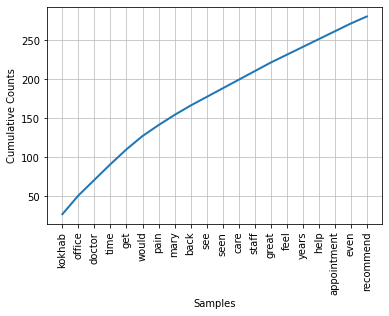

In [ ]:
# draw the frequency distribution plot
fdist_reviews.plot(20, cumulative=True)